In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Supressing a warning about deprecated sns.distplot further down

In [2]:
data = pd.read_excel('regression_data.xls')
data.head(100)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
5,7237550310,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
6,1321400060,2014-06-27,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,257500
7,2008000270,2015-01-15,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,291850
8,2414600126,2015-04-15,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,229500
9,3793500160,2015-03-12,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,323000


In [3]:
data.shape

(21597, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [5]:
data.duplicated().sum()
#Checking for duplicated rows

0

In [6]:
data = data.drop(['id'], axis=1)
data.head()
# Dropping the unique id column, it isnt needed in the model

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [7]:
data.head(100)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
5,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
6,2014-06-27,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,257500
7,2015-01-15,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,291850
8,2015-04-15,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,229500
9,2015-03-12,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,323000


In [8]:
data['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [9]:
data['zipcode'] = data['zipcode'].astype(object)
data['zipcode'].dtype
# Changing zipcode column to object type since values are discrete 
# and also expected to have significant impact on sale price.
# Values will be encoded at a later step

dtype('O')

In [10]:
data['date'] = pd.DatetimeIndex(data['date']).month
data['date'].value_counts()
# Changing date column to only month of purchase. Time of year is expected to have an affect on purchase price, 
# day by day less so and all records cover only one calendar year

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: date, dtype: int64

In [11]:
data = data.rename(columns = {'date':'purch_month'})
data['purch_month'] = data['purch_month'].astype(object)
data['purch_month'].dtype
#Changing the month value to Object since month of a year is a discrete value. Renaming column

dtype('O')

In [12]:
data['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
2007       35
2000       35
2004       26
1990       25
2006       24
2002       22
2009       22
1989       22
1991       20
1998       19
2001       19
1994       19
1993       19
1987       18
2010       18
2008       18
1983       18
1984       18
1985       17
1999       17
1992       17
1986       17
2015       16
1995       16
1988       15
1996       15
1997       15
2011       13
2012       11
1980       11
1982       11
1979       10
1970        9
1977        8
1968        8
1978        6
1975        6
1973        5
1965        5
1981        5
1964        5
1958        5
1960        4
1972        4
1963        4
1969        4
1976        3
1974        3
1953        3
1955        3
1956        3
1945        3
1957        3
1950        2
1962        2
1940        2
1946        2
1971        2
1967        2
1934        1
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, 

In [13]:
check = data['yr_renovated'] == 0
data.loc[check, 'yr_renovated'] = data.loc[check, 'yr_built']
data['yr_renovated'].value_counts()

# Replacing the 0 values in year renovated with the corresponding year built value 
# An unrenovated home will have the same year in both columns

2014    650
2005    485
2006    477
2004    459
2003    455
2007    452
1977    417
1978    389
2008    385
1968    370
1979    351
1967    342
1990    341
1959    326
2001    324
1989    311
1987    309
1962    298
1954    292
1988    283
1999    280
1969    273
1994    268
1955    257
1998    256
2000    253
2009    252
1976    249
1966    248
1980    245
1963    245
1947    245
2002    244
1984    244
1960    243
1991    243
1985    243
2013    238
1986    230
1983    226
1993    221
1961    220
1950    220
1958    219
1948    218
1992    215
1951    213
1953    208
1996    207
1952    203
1981    201
1942    199
1956    192
1997    192
1975    191
1957    190
1995    185
1965    181
2012    181
1949    179
1964    174
1926    164
2010    161
1974    160
1943    152
1973    150
1925    149
1972    146
1940    144
1941    144
2011    143
1970    134
1944    129
1924    119
1910    117
1946    117
1928    116
1982    114
1929    110
1927    107
1918    107
1971    102
1939     95
1945

In [14]:
matched_rows = data[data['yr_renovated'] == data['yr_built']]
matched_rows = pd.DataFrame(matched_rows)
matched_rows
#Checking for rows with matching Yr_reno and yr_built values. 
# Making sure row count matches count of 0 values in original yr_reno column

,purch_month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,10,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650,221900
2,2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062,180000
3,12,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000,604000
4,2,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503,510000
5,5,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,2001,98053,47.6561,-122.005,4760,101930,1230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,2009,98103,47.6993,-122.346,1530,1509,360000
21593,2,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,2014,98146,47.5107,-122.362,1830,7200,400000
21594,6,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,2009,98144,47.5944,-122.299,1020,2007,402101
21595,1,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,2004,98027,47.5345,-122.069,1410,1287,400000


In [15]:
data = data.drop(['lat', 'long'], axis=1)
#Dropping latitude and longitude columns. Without more specific local knowledge the coordinates are not helful to us.
# zipcode wil be sufficient for a location variable

In [16]:
data['condition'].value_counts()


3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [17]:
data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [18]:
data['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [19]:
data['view'].value_counts()

# Im assuming this to be a 1-5 grade of the quality of the view from the home with 0 value representing grade of 1 for no special view

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   purch_month    21597 non-null  object 
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  object 
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  price          21597 non-null  int64  
dtypes: flo

In [21]:
num_feats = data.drop(['price', 'purch_month', 'zipcode'], axis=1)


In [22]:
cor_matrix = num_feats.corr()
cor_matrix

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.166855,0.393406,0.030690
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.538272,0.569884,0.088303
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.343832,0.756402,0.184342
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.052788,0.144763,0.718204
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.505319,0.280102,-0.010722
waterfront,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,-0.000526,0.086507,0.030781
view,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,-0.018442,0.280681,0.072904
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.396614,-0.093072,-0.003126
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.461655,0.713867,0.120981
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.072109,0.167609,-0.158904,0.756073,1.000000,-0.052156,0.424037,0.436028,0.731767,0.195077


<AxesSubplot:>

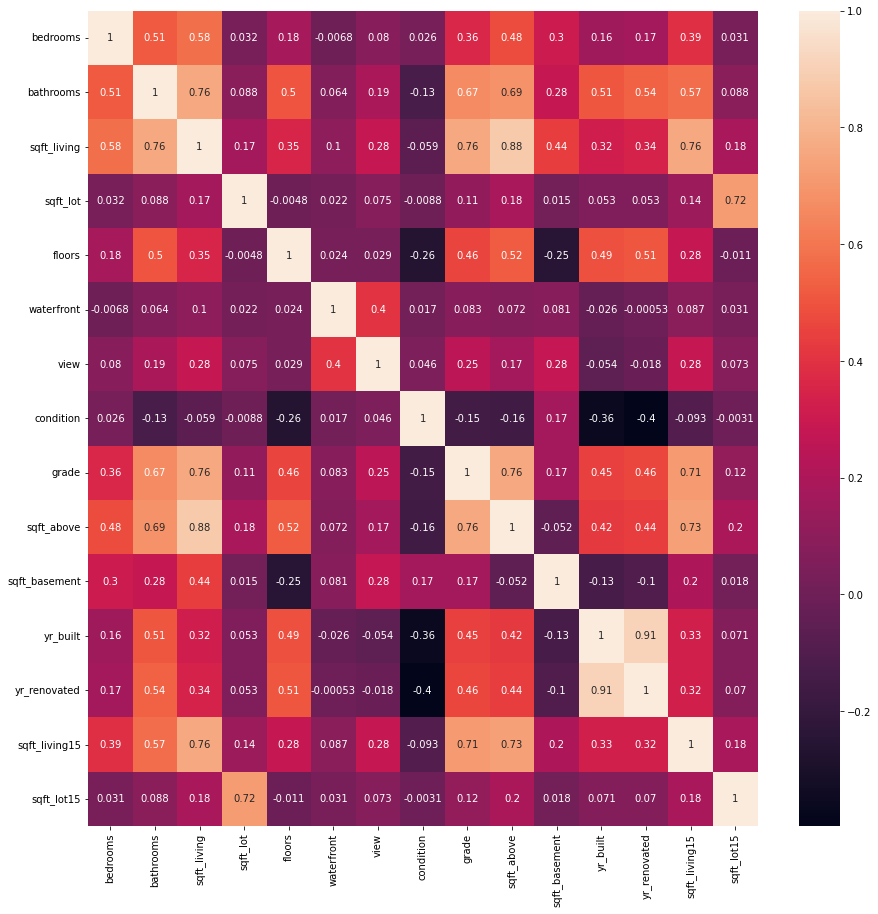

In [23]:
fig, ax = plt.subplots(figsize=(15,15)) 

sns.heatmap(cor_matrix, annot=True)

# There is high collinearity between several columns (sqft_living/sqft_above and yr_renovated/yr_built) but given
# the details of the dataset and the way weve modified the yr_renovated this is to be expected.
# I will keep these columns despite the high colinearity

In [24]:
#  Exporting cleaned dataset. We'll import this a new workbook before building the model

data.to_csv('cleaned_data.csv', index=False)